In [3]:
import pandas as pd
import numpy as np
import feather
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


ModuleNotFoundError: No module named 'feather'

In [2]:
# Write data and labels from Riya's two separate files to a single file
# train_data = feather.read_dataframe("x_train_ADDEDPDMS.feather")
# test_data = feather.read_dataframe("x_test_ADDEDPDMS.feather")
# train_labels = pd.read_csv("y_train_ADDEDPDMS.csv", names=["labels"])
# test_labels = pd.read_csv("y_test_ADDEDPDMS.csv", names=["labels"])
# print(train_data)
# print(test_labels[:10])

# train_data['labels'] = train_labels
# print(train_data)

# test_data["labels"] = test_labels
# print(test_data.shape)

# train_data.to_feather("training_data.feather")
# test_data.to_feather("testing_data.feather")

In [13]:
'''
Reading the cell diferentiation data. . .
Each row corresponds to one gene and each column corresponds to reading at a particular time of a day
Transpose is required to map it to the cancer genome data
'''
cell_diff_data = pd.read_csv("FPKM_gene_counts_FPKM.csv")
# print(cell_diff.iloc[10:20])
cell_diff_data = cell_diff_data.dropna(axis=1) #remove the NaN columns 
cell_diff_data = cell_diff_data.applymap(lambda x: str(x).strip('gene-')) #each gene name has a prefix 'gene-' so remove that
cell_diff_data = cell_diff_data.T #transpose the dataframe
#Some processing to fix the indexing and column names after transpose
cell_diff_data = cell_diff_data.reset_index(drop=True)
cols = cell_diff_data.iloc[0]
cell_diff_data = cell_diff_data[1:]
cell_diff_data.columns = cols
cell_diff_data = cell_diff_data.reset_index(drop=True)
cell_diff_data.head()

,MIR6859-1,LOC100996442,LOC112268260,LOC100132287,LOC105378947,LOC101928626,MIR12136,OR4F16,LOC100133331,LOC107984841,...,ND4,TRNH,TRNS2,TRNL2,ND5,ND6,TRNE,CYTB,TRNT,TRNP
0,0.0,0.10761139162611501,0.0,0.0,0.0,0.0,191.30003638478803,0.0,0.0,0.07015144867272,...,2053.5872398330703,0.0,0.0,45.745660874623205,999.05337770341,384.691302980987,0.0,1737.4457863889402,0.0,4854.54420976717
1,1.6383043667612902,0.066212302147001,0.0,0.118768333624486,0.044542280172630996,0.0,12.5526419087063,0.067693292069682,0.169787258562677,0.061759157248624005,...,998.6000120464549,0.0,1.88821520236895,3.13816047717656,455.455847091502,209.016431401279,0.0,544.721125527577,0.0,2039.68893661781
2,0.0,0.061441046729489995,0.001059599636493,0.142466447074181,0.048086911606903,0.0,31.996760071054897,0.11441858664373401,0.29095041880161604,0.052915786550876,...,1652.67240434966,1.9367177877620603,0.0,0.0,798.9986950167649,367.810375292984,0.0,829.792761888081,4.04950082895704,2000.5725124703301
3,1.9096247265341002,0.056791176566937995,0.012355620391001,0.35993779493734396,0.06230273786941,0.0,7.315745431229219,0.20443311716417603,0.6502619360547199,0.185109738281281,...,558.148108387358,0.0,0.0,9.14468178903652,431.200008062795,413.060921800404,1.88194900585969,764.787129743226,0.0,416.298190384433
4,3.1252385548818795,0.07566501679280499,0.005897751897539,0.36250101787968897,0.033987640915112,0.0,23.9454897726161,0.079240153382908,0.277617533288005,0.151472716843883,...,1229.60220309795,0.0,1.80098492993193,4.4897793323655195,639.425188125104,339.41876556619997,1.53997262124614,847.92296181839,0.0,861.003221869957


In [2]:
'''There is something wrong with the way these files are extracted, use tcga_tissue.csv instead'''
# training_data = pd.read_feather("training_data.feather")
# testing_data = pd.read_feather("testing_data.feather")
# # Create a dictionary such that each class of cancer corresponds to an integer
# label_encoder = {name:key for key, name in enumerate(set(training_data["labels"]))}
# # print(label_encoder)
# #Create a decoder to get the class name based on integer value later
# label_decoder = {v:k for k, v in label_encoder.items()}

# train_x = training_data[list(training_data.columns[:-1])]
# print(type(train_x))
# #get the integer label and convert to one hot encoding labels
# train_y = np.array([label_encoder[i] for i in training_data["labels"]])
# train_y = keras.utils.to_categorical(train_y)    
# # print(train_y[:2])



'There is something wrong with the way these files are extracted, use tcga_tissue.csv instead'

In [63]:
# # Split the training data into training and validation set 
# #(cannot be done while training because data is sorted by class name in this case)
# x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, shuffle= True)
# print(type(x_train))

# x_test = testing_data[list(training_data.columns[:-1])]
# y_test = np.array([label_encoder[i] for i in testing_data["labels"]])
# y_test = keras.utils.to_categorical(y_test)
# # print(y_test[:2])
# print(x_train.shape)
# print(y_train.shape)
# print(type(x_train))
# len(training_data['labels'].unique())
# x_train[0:10]

In [3]:
training_data = pd.read_feather("training_data.feather")
training_data.head()

,HBD,ACADM,ACTN2,ADAR,PARP1,ADSS,AGL,AK2,AK4,ALDH9A1,...,ZBTB32,ZCCHC13,ZNF154,ZNF233,ZNF287,ZNF385C,ZNF776,ZNF829,ZPBP2,labels
0,0.317289,-0.688394,-0.306126,-0.199950,-0.178647,-1.051935,-0.537612,-0.121948,0.366931,0.315178,...,-0.295953,-0.193038,-0.882175,-0.814533,0.424844,-0.922416,-0.716146,0.621287,-0.172060,adrenal
1,0.209069,0.170438,0.253659,-1.041949,-0.833734,-0.694792,-0.512401,-0.477414,-1.602415,0.468233,...,-0.470018,-0.193038,0.870632,0.142760,0.061802,-0.922416,-0.377147,-0.140626,-0.211608,adrenal
2,2.024755,-0.800416,0.228214,-0.679570,-0.393750,-0.194793,-0.726692,-0.595902,-0.553243,-0.508962,...,0.322942,-0.193038,0.262145,-0.216225,-0.884698,-0.899548,-0.964746,-0.492278,-0.211608,adrenal
3,-0.380127,2.659807,0.877056,-0.359823,0.975088,-0.266221,0.193497,0.352006,-1.714212,1.410107,...,-0.489358,-0.193038,1.351973,1.185525,0.645262,-0.991020,0.831952,0.313591,-0.211608,adrenal
4,-0.380127,0.842568,-0.369738,0.290329,0.163562,-0.290031,0.092654,-1.366078,0.108938,0.279858,...,-0.083208,-0.193038,-0.082967,0.313705,1.578796,-0.122038,0.210452,-0.492278,-0.211608,adrenal


In [4]:
print(training_data['labels'].unique())

['adrenal' 'liver/bile duct' 'bladder/urothelial' 'breast' 'neurologic'
 'digestive/gastrointestinal' 'squamous' 'lung' 'hematologic/blood'
 'melanoma' 'head & neck' 'gynecologic' 'sarcoma/mesothelioma' 'prostate'
 'kidney' 'thyroid' 'germ cell']


In [15]:
training_data = pd.read_feather("tcga_tissue.feather")

# Create a dictionary such that each class of cancer corresponds to an integer
label_encoder = {name:key for key, name in enumerate(set(training_data["tissue"]))}
# print(label_encoder)

#Create a decoder to get the class name based on integer value later
label_decoder = {v:k for k, v in label_encoder.items()}

train_x = training_data[list(training_data.columns[1:])]
#get the integer label and convert to one hot encoding labels
train_y = np.array([label_encoder[i] for i in training_data["tissue"]])
print(len(set(train_y)))
train_y = keras.utils.to_categorical(train_y)    

overlapping_cols = np.intersect1d(train_x.columns, cell_diff_data.columns)
print(overlapping_cols.shape)

train_x = train_x[overlapping_cols]

# Split the training data into training and validation set 
#(cannot be done while training because data is sorted by class name in this case)
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, shuffle= True)

# print(y_test[:2])
print(x_train.shape)
print(y_train.shape)
print(type(x_train))
print(training_data['tissue'].unique())
x_train[0:10]

<class 'pandas.core.frame.DataFrame'>
25
(9003,)
(8864, 9003)
(8864, 25)
<class 'pandas.core.frame.DataFrame'>
['adrenal gland' 'bile duct' 'bladder' 'breast' 'brain' 'colon' 'cervix'
 'stomach' 'head and neck' 'lung' 'leukemia/lymphoma' 'liver' 'melanoma'
 'oesophagus' 'ovary' 'pancreas' 'pleura' 'prostate' 'kidney' 'sarcoma'
 'skin' 'thyroid' 'thymus' 'testes' 'uterus']


,A1BG,A2ML1,A4GALT,AAAS,AACS,AAGAB,AAMP,AAR2,AARS2,AASDH,...,ZSWIM4,ZSWIM7,ZSWIM8,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11B,ZZZ3
2651,-0.046552,1.686705,-1.181536,-0.16094,-0.236397,0.442037,0.705409,0.061123,-0.371485,0.440696,...,0.08313,0.889214,0.045619,-0.0331,-0.553593,0.679672,0.321089,0.754787,0.533007,0.269061
7242,-0.186552,-0.713295,0.898464,0.43906,0.623603,0.772037,0.445409,0.201123,0.418515,-0.429304,...,0.75313,0.309214,0.015619,-0.3631,-0.193593,-1.060328,-1.198911,-0.235213,-0.126993,-0.240939
2251,-0.096552,0.356705,-2.041536,-0.34094,-0.996397,-0.637963,0.105409,-0.128877,-0.041485,0.470696,...,-0.39687,-0.120786,0.175619,0.1269,-0.883593,0.779672,0.501089,-0.225213,0.643007,0.299061
7823,-0.456552,-0.643295,0.438464,0.02906,0.823603,0.072037,0.675409,0.281123,-0.021485,-0.049304,...,-0.65687,0.069214,0.405619,0.0969,-0.283593,0.419672,0.161089,-0.105213,0.183007,0.039061
1940,0.243448,-0.693295,0.718464,0.47906,0.253603,0.752037,0.605409,0.731123,0.838515,0.070696,...,0.05313,0.069214,0.465619,0.4869,0.416407,0.659672,1.171089,0.664787,0.013007,0.199061
7613,-0.526552,-0.623295,0.518464,0.56906,0.633603,0.272037,0.825409,-0.028877,0.038515,0.030696,...,-0.73687,0.829214,-0.724381,-0.1731,-0.913593,-0.080328,-0.208911,-0.105213,-0.816993,-0.290939
2403,-0.446552,0.216705,-1.231536,-0.59094,-0.916397,-0.907963,0.115409,-0.528877,-0.641485,0.240696,...,-0.30687,-0.160786,-0.144381,-0.7631,-1.253593,0.569672,-0.308911,-0.585213,-0.326993,-0.940939
2778,-0.496552,-0.723295,-0.881536,0.66906,1.253603,-0.767963,0.935409,-0.428877,0.648515,-0.669304,...,0.38313,-0.830786,0.675619,-0.7831,-0.793593,-1.210328,-1.738911,0.114787,-1.446993,-0.860939
4691,-0.206552,-0.713295,0.778464,-0.26094,-0.256397,-0.277963,0.015409,0.481123,-0.311485,-0.069304,...,0.25313,0.229214,0.625619,-0.0831,-0.553593,0.069672,0.021089,0.444787,0.383007,-0.290939
2504,-0.366552,-0.363295,0.848464,-0.20094,-0.936397,0.162037,0.645409,0.051123,0.318515,0.110696,...,-0.26687,0.929214,0.385619,0.1669,-0.543593,0.839672,0.471089,0.104787,-0.146993,-0.390939


In [17]:
model = Sequential()
model.add(Dense(1024, activation="relu", input_dim = x_train.shape[1]))
# model.add(Dropout(0.25))
model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.25))
model.add(Dense(128, activation="relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

W0106 16:40:26.256714 139777749251904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0106 16:40:26.282022 139777749251904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0106 16:40:26.283921 139777749251904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0106 16:40:26.319199 139777749251904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0106 16:40:26.335218 139777749251904 deprecation_wrappe

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              9220096   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 25)                3225      
Total params: 9,813,785
Trainable params: 9,813,785
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), verbose=1, epochs=20, shuffle=True)

W0106 16:40:31.090470 139777749251904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0106 16:40:31.122795 139777749251904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8864 samples, validate on 2217 samples
Epoch 1/20
8864/8864 [==============================] - 22s 2ms/step - loss: 0.8080 - acc: 0.8616 - val_loss: 0.4141 - val_acc: 0.9238
Epoch 2/20
8864/8864 [==============================] - 21s 2ms/step - loss: 0.2781 - acc: 0.9478 - val_loss: 0.3015 - val_acc: 0.9432
Epoch 3/20
8864/8864 [==============================] - 21s 2ms/step - loss: 0.2409 - acc: 0.9519 - val_loss: 0.3299 - val_acc: 0.9373
Epoch 4/20
8864/8864 [==============================] - 21s 2ms/step - loss: 0.2406 - acc: 0.9580 - val_loss: 0.2884 - val_acc: 0.9477
Epoch 5/20
8864/8864 [==============================] - 22s 2ms/step - loss: 0.1735 - acc: 0.9664 - val_loss: 0.2723 - val_acc: 0.9477
Epoch 6/20
8864/8864 [==============================] - 21s 2ms/step - loss: 0.1248 - acc: 0.9744 - val_loss: 0.3087 - val_acc: 0.9436
Epoch 7/20
8864/8864 [==============================] - 21s 2ms/step - loss: 0.1276 - acc: 0.9747 - val_loss: 0.2477 - val_acc: 0.9567
Epoch 8

In [23]:
valid_loss, valid_accuracy = model.evaluate(x_valid, y_valid)
print(valid_loss, valid_accuracy)

predicted_valid_labels = np.argmax(model.predict(x_valid), axis=1)
valid_labels = np.argmax(y_valid, axis=1)

print("Predicted labels: ", predicted_valid_labels[:10])
print("True labels: ", valid_labels[:10])
print("Predicted labels: ", [label_decoder[i] for i in predicted_valid_labels[:10]])
print("True labels: ", [label_decoder[i] for i in valid_labels[:10]])
# print([(label_decoder[i], label_decoder[j]) for i, j in zip(predicted_valid_labels[:10], valid_labels[:10])])

2217/2217 [==============================] - 0s 163us/step
0.3971718292169602 0.9404600811907984
[21 23 17  4  6 23 21  5  7 23]
[21 23 17  4  6 23 21  5  7 23]
['uterus', 'kidney', 'head and neck', 'breast', 'skin', 'kidney', 'uterus', 'ovary', 'cervix', 'kidney']
['uterus', 'kidney', 'head and neck', 'breast', 'skin', 'kidney', 'uterus', 'ovary', 'cervix', 'kidney']


In [26]:
pred = model.predict(cell_diff_data[overlapping_cols])
print(pred)
predicted_cell_diff_labels = np.argmax(model.predict(cell_diff_data[overlapping_cols]), axis=1)
print(predicted_cell_diff_labels)
print([label_decoder[i] for i in predicted_cell_diff_labels])

[[4.05186303e-02 3.29648294e-02 3.24351564e-02 3.72929350e-02
  5.17186522e-02 3.16534601e-02 4.26417142e-02 3.98639925e-02
  4.11675572e-02 3.86676565e-02 3.56546305e-02 5.06301410e-02
  4.08900045e-02 3.80554944e-02 3.19466703e-02 4.46961485e-02
  4.92295474e-02 3.89093012e-02 3.35458517e-02 3.99872288e-02
  3.81790474e-02 4.32723500e-02 3.49074788e-02 4.75783423e-02
  4.35932055e-02]
 [3.91180663e-07 1.82923426e-10 5.28434434e-08 3.22321148e-06
  6.12269696e-06 2.61084642e-04 7.33795663e-12 1.30098168e-10
  2.76158273e-04 1.26990408e-01 8.43098036e-09 2.56277730e-07
  9.36762808e-05 2.66603184e-10 3.00943611e-06 4.72039341e-09
  5.31475983e-08 1.06943412e-06 1.72914305e-08 8.72363329e-01
  1.19947310e-06 8.95861232e-11 6.04049536e-12 4.40600223e-10
  8.09928846e-10]
 [3.58294696e-02 1.35998679e-02 2.30534598e-02 4.36282493e-02
  5.70889674e-02 5.66564016e-02 1.32231703e-02 1.70352161e-02
  6.42112270e-02 1.18186288e-01 2.19403263e-02 4.97583076e-02
  5.66147044e-02 1.44707663e-02 4.

Text(0.5, 1, 'Accuracy Score: 0.9405')

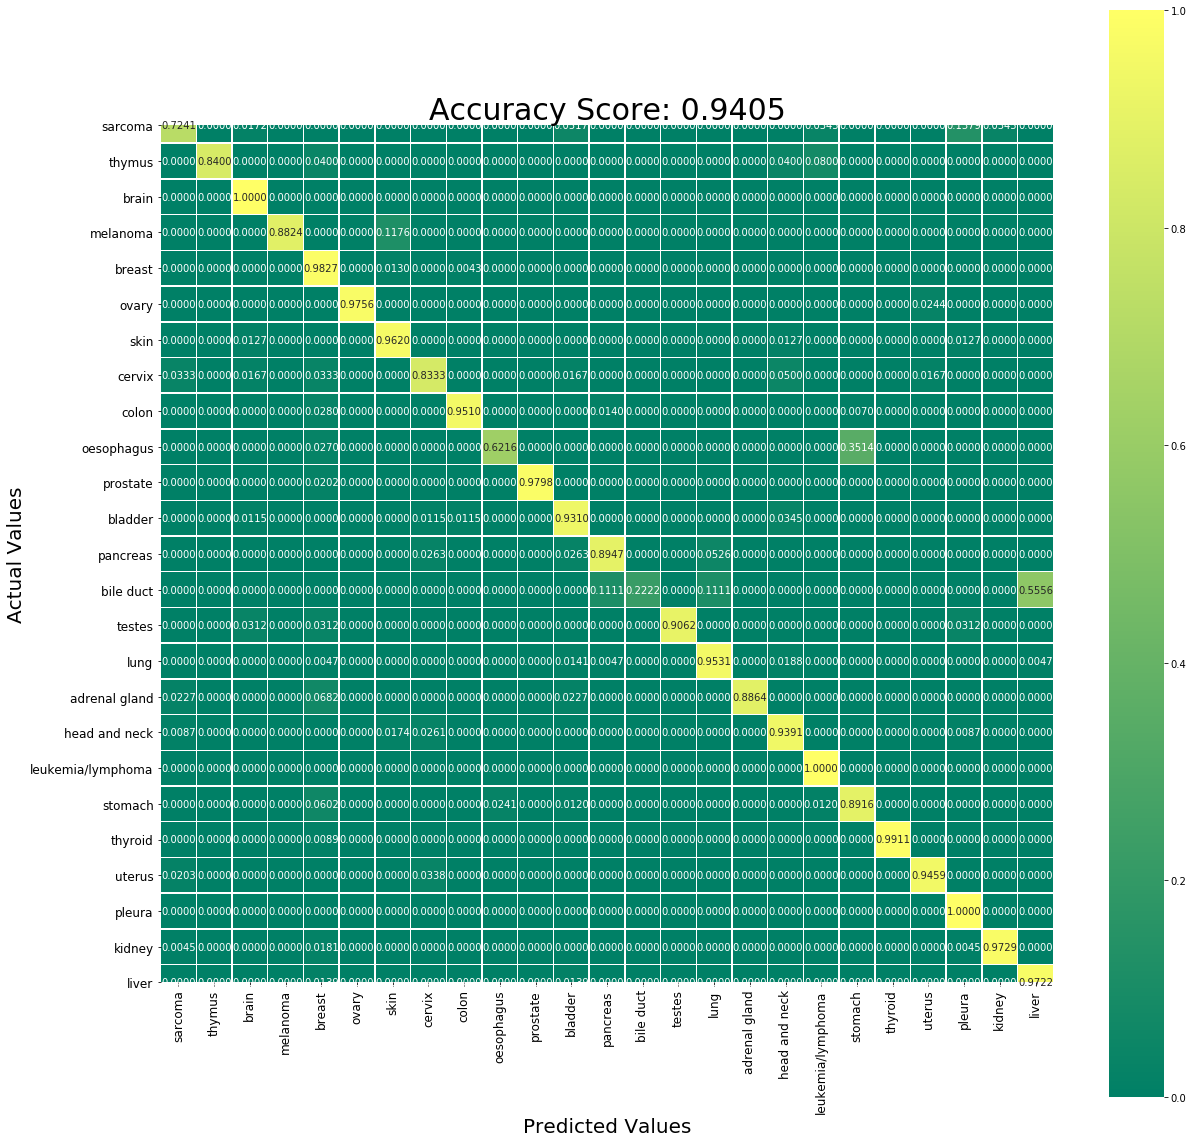

In [64]:
# Visualization of Confusion Matrix
import seaborn as sns

cm = metrics.confusion_matrix(valid_labels, predicted_valid_labels)
# print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20,20))
sns.heatmap(cm_normalized, annot=True, fmt=".4f", linewidths=.5, square = True, cmap = 'summer')
plt.xlabel('Predicted Values', size=20)
plt.ylabel('Actual Values', size=20)

ticks = np.arange(len(set(valid_labels)))
tick_marks = [label_decoder[i] for i in ticks]

plt.xticks(ticks+0.5 ,tick_marks, rotation=90, size=12) #add 0.5 to ticks to position it at center
plt.yticks(ticks+0.5 ,tick_marks, rotation=0, size=12)
all_sample_title = 'Accuracy Score: {:.4f}'.format(valid_accuracy) 
plt.title(all_sample_title, size = 30)



In [61]:
print(metrics.classification_report(valid_labels, predicted_valid_labels))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        58
           1       1.00      0.84      0.91        25
           2       0.97      1.00      0.98       149
           3       1.00      0.88      0.94        17
           4       0.90      0.98      0.94       231
           5       1.00      0.98      0.99        82
           6       0.92      0.96      0.94        79
           7       0.83      0.83      0.83        60
           8       0.99      0.95      0.97       143
           9       0.92      0.62      0.74        37
          10       1.00      0.98      0.99        99
          11       0.88      0.93      0.91        87
          12       0.89      0.89      0.89        38
          13       1.00      0.22      0.36         9
          14       1.00      0.91      0.95        32
          15       0.99      0.95      0.97       213
          16       1.00      0.89      0.94        44
          17       0.90    

In [71]:
import numpy as np
from sklearn import linear_model, preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
X = scaler.transform(x_train)
y = np.argmax(y_train, axis=1)
val_X = scaler.transform(x_valid)
val_y = np.argmax(y_valid, axis=1)

lin_sgd = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
lin_sgd.fit(X, y)
lin_sgd.score(val_X, val_y)

0.9652683806946324

In [73]:
lin_val_pred = lin_sgd.predict(val_X)
print("Predicted valid labels: ", lin_val_pred[10:20])
print("True valid labels: ", val_y[10:20])
print("Predicted valid labels: ", [label_decoder[i] for i in lin_val_pred[10:20]])
print("True valid labels: ", [label_decoder[i] for i in val_y[10:20]])

lin_pred = lin_sgd.predict(cell_diff_data[overlapping_cols])
print(lin_pred)
print("Predicted labels: ", [label_decoder[i] for i in lin_pred])

Predicted valid labels:  [ 8  8 24 11 21 16 17 23 10  6]
True valid labels:  [ 8  8 24 11 21 16 17 23 10  6]
Predicted valid labels:  ['colon', 'colon', 'liver', 'bladder', 'uterus', 'adrenal gland', 'head and neck', 'kidney', 'prostate', 'skin']
True valid labels:  ['colon', 'colon', 'liver', 'bladder', 'uterus', 'adrenal gland', 'head and neck', 'kidney', 'prostate', 'skin']
[21  7  7  2 21 21 21 21 21 21  2 21  2  2  2]
Predicted labels:  ['uterus', 'cervix', 'cervix', 'brain', 'uterus', 'uterus', 'uterus', 'uterus', 'uterus', 'uterus', 'brain', 'uterus', 'brain', 'brain', 'brain']


In [74]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state=0, tol=1e-5)
svc.fit(X, y)
svc.score(val_X, val_y)


/home/sayeradbl/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9824086603518268

In [75]:
svc_val_pred = svc.predict(val_X)
print("Predicted valid labels: ", svc_val_pred[10:20])
print("True valid labels: ", val_y[10:20])
print("Predicted valid labels: ", [label_decoder[i] for i in svc_val_pred[10:20]])
print("True valid labels: ", [label_decoder[i] for i in val_y[10:20]])

svc_pred = svc.predict(cell_diff_data[overlapping_cols])
print(svc_pred)
print("Predicted labels: ", [label_decoder[i] for i in svc_pred])

Predicted valid labels:  [ 8  8 24 11 21 16 17 23 10  6]
True valid labels:  [ 8  8 24 11 21 16 17 23 10  6]
Predicted valid labels:  ['colon', 'colon', 'liver', 'bladder', 'uterus', 'adrenal gland', 'head and neck', 'kidney', 'prostate', 'skin']
True valid labels:  ['colon', 'colon', 'liver', 'bladder', 'uterus', 'adrenal gland', 'head and neck', 'kidney', 'prostate', 'skin']
[13 14 14  2 17  8  8  8  8  2  8  8  8  2  2]
Predicted labels:  ['bile duct', 'testes', 'testes', 'brain', 'head and neck', 'colon', 'colon', 'colon', 'colon', 'brain', 'colon', 'colon', 'colon', 'brain', 'brain']
